This notebook plots orbits for the Kepler problem.  Begin by importing relevant packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define a routine to compute the coordinates of the object in its orbit given the eccentricity.  Only include the positive branch of the radial coordinate.

In [2]:
def calc_xy(e):
    thetas = np.linspace(-np.pi, np.pi, 500)

    x = []
    y = []
    for theta in thetas:
        r = (1 + e) / (1 + e * np.cos(theta) + 1.e-300)
        if r > 0 and not np.isnan(r):
            x.append(r * np.cos(theta))
            y.append(r * np.sin(theta))

    return (x,y)

Set the parameter $\alpha$.  $\alpha = E / (GMm / r_p)$, so it gives the ratio of the energy to the magnitude of the gravitational potential energy at closest approach.  $\alpha$ is negative if the total energy is negative (so that the orbit is bound).  This cell checks the input and prints out the resulting eccentricity.

In [3]:
alpha = -0.25

beta = 2. * (1. + alpha)
            
assert(alpha >= -0.5 and 1 + 4. * alpha * (1. + alpha )>= 0)
e = np.sqrt(1. + 4. * alpha * (1. + alpha))
print('The eccentricity e = {:.4f}.'.format(e))

The eccentricity e = 0.5000.


Now compute and plot the orbit.  If the orbit is bound, the cell adjusts the axis limits to include the whole orbit.

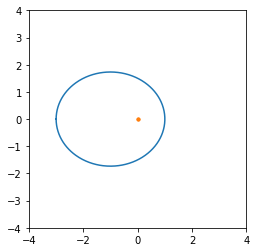

In [4]:
x, y = calc_xy(e)

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x, y)
plt.plot([0,0], [0,0], '.')

m = 4

if e < 1:
    if np.max(x) >= 4:
        m = 1.1 * np.max(x)

    if np.min(x) <= -4:
        m = -1.1 * np.min(x)
        
plt.xlim(-m, m)
plt.ylim(-m, m)

ax.set_aspect('equal', adjustable='box')

Plot the scaled total energy ($E / (GMm/r_p)$) and the scaled effective potential energy $U_{eff} = \frac{1}{2} \beta \left(\frac{r_p}{r}\right)^2 - \left(\frac{r_p}{r}\right)$, where $\beta = (L^2/(2mr_p^2))/(GMm/r_p))$ is the scaled angular momentum kinetic energy.

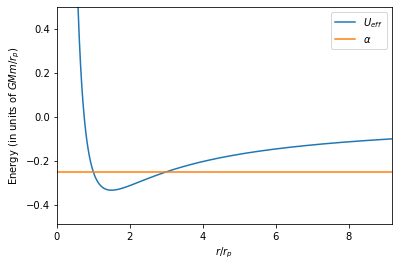

In [5]:
beta = 2. * (1. + alpha)
if alpha > 0:
    zl = np.power(1./beta + np.sqrt(1 + 4. * beta * alpha) / beta, -1)
else:
    zl = np.power(1./beta + np.sqrt(1 + beta) / beta, -1)
    
zu = np.power(1./beta - np.sqrt(1 - 0.2 * beta) / beta, -1)
        
z = np.linspace(zl, zu, 1000)
plt.plot(z, 0.5 * beta / z**2 - 1. / z, label = '$U_{eff}$')
plt.plot([0,1.1*zu], [alpha, alpha], label = '$\\alpha$')

yl = 1.1 * (0.5 / beta**2 - 1. / beta)
yu = 0.5 * beta / zl**2 - 1. / zl

plt.xlim([0, zu])
plt.ylim([yl, yu])
plt.xlabel('$r / r_p$')
plt.ylabel('Energy (in units of $GMm/r_p$)')
plt.legend()
plt.show()